# This project will find algorithms to automatically classify 100 plant species using the features extracted from the leaf images.

In [29]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats
from skimage import feature, io
#from skimage.viewer import ImageViewer
#from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
#from sklearn.svm import SVR
#from sklearn.neural_network import MLPRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import metrics, feature_selection, preprocessing

## Part I
### The data were downloaded from UCI. There are three types of pre-extracted features, texture, shape and margin stored in three files. They represent image features extracted from 100 species, each of which consist of 16 samples. Each file consists of 64 feature vectors (columns).

In [506]:
#Define the directory where the images are stored.
data_dir = 'data/100 leaves plant species/'

#A function to read the pre-extracted feature vectors and output basic information; 
#no header; do not use the first column as index; manually assign column names.
def data_input(file, prefix, n_cols):
    df = pd.read_csv(data_dir+file, header=None, index_col=False,
                     names=[prefix+str(i) for i in range(int(n_cols))])
    print('Basic infomation of '+file)
    #Check the first two rows.
    print(df.head(2),'\n')
    #Check the shapes of the datasets
    print('(rows, columns):')
    print(df.shape,'\n')
    #Check whether there is any null value.
    print('Amount of null values:')
    print(df.isnull().sum().sum())
    return df

In [507]:
#Call the function and save the read dataframe to df_tex.
df_tex = data_input('data_Tex_64.txt', 'tex', 65)

Basic infomation of data_Tex_64.txt
             tex0      tex1      tex2      tex3      tex4      tex5  tex6  \
0  Acer Campestre  0.025391  0.012695  0.003906  0.004883  0.039062   0.0   
1  Acer Campestre  0.004883  0.018555  0.002930  0.000000  0.069336   0.0   

       tex7      tex8      tex9    ...        tex55  tex56     tex57  \
0  0.017578  0.035156  0.023438    ...     0.103520    0.0  0.001953   
1  0.013672  0.043945  0.026367    ...     0.070312    0.0  0.017578   

      tex58     tex59  tex60  tex61     tex62  tex63     tex64  
0  0.000977  0.022461    0.0    0.0  0.001953    0.0  0.027344  
1  0.000000  0.004883    0.0    0.0  0.000000    0.0  0.002930  

[2 rows x 65 columns] 

(rows, columns):
(1599, 65) 

Amount of null values:
0


In [508]:
df_sha = data_input('data_Sha_64.txt', 'sha', 65)

Basic infomation of data_Sha_64.txt
              sha0      sha1      sha2      sha3      sha4      sha5  \
0  Acer Capillipes  0.000579  0.000609  0.000551  0.000554  0.000603   
1  Acer Capillipes  0.000630  0.000661  0.000719  0.000651  0.000643   

       sha6      sha7      sha8      sha9    ...        sha55     sha56  \
0  0.000614  0.000611  0.000611  0.000611    ...     0.000507  0.000533   
1  0.000640  0.000646  0.000624  0.000584    ...     0.000503  0.000520   

      sha57     sha58     sha59     sha60     sha61     sha62     sha63  \
0  0.000555  0.000565  0.000581  0.000597  0.000625  0.000624  0.000617   
1  0.000533  0.000564  0.000596  0.000623  0.000642  0.000661  0.000671   

      sha64  
0  0.000614  
1  0.000667  

[2 rows x 65 columns] 

(rows, columns):
(1600, 65) 

Amount of null values:
0


In [509]:
df_mar = data_input('data_Mar_64.txt', 'mar', 65)

Basic infomation of data_Mar_64.txt
             mar0      mar1      mar2      mar3      mar4      mar5      mar6  \
0  Acer Campestre  0.003906  0.003906  0.027344  0.033203  0.007812  0.017578   
1  Acer Campestre  0.005859  0.013672  0.027344  0.025391  0.013672  0.029297   

       mar7      mar8      mar9  ...       mar55  mar56     mar57     mar58  \
0  0.023438  0.005859  0.000000  ...    0.011719    0.0  0.005859  0.035156   
1  0.019531  0.000000  0.001953  ...    0.017578    0.0  0.021484  0.017578   

      mar59     mar60     mar61     mar62     mar63  mar64  
0  0.027344  0.033203  0.001953  0.000000  0.017578    0.0  
1  0.046875  0.005859  0.003906  0.003906  0.046875    0.0  

[2 rows x 65 columns] 

(rows, columns):
(1600, 65) 

Amount of null values:
0


### To find out why the texture dataset has one row less than the other two datasets.

In [494]:
#First, check if all the datasets contain 100 plant species.
print(len(df_tex['tex0'].unique()))
print(len(df_sha['sha0'].unique()))
print(len(df_mar['mar0'].unique()))

100
100
100


In [497]:
#A function to extract the unique plant names from the three dataframes and put them into a new dataframe for comparison.
def name_col_compare(df1, df2, df3):
    comp_df = pd.DataFrame()
    comp_df[df1.columns[0]] = df1[df1.columns[0]].unique()
    comp_df[df2.columns[0]] = df2[df2.columns[0]].unique()
    comp_df[df3.columns[0]] = df3[df3.columns[0]].unique()
    diff = comp_df[comp_df.apply(lambda x: len(set(x)) != 1, axis=1)]
    print('Number of rows different in species names: ',len(diff),'\n')
    print(diff.head())

In [498]:
#extract the specimen labels and compare.
name_col_compare(df_tex, df_sha, df_mar)

Number of rows different in species names:  99 

              tex0                sha0             mar0
0   Acer Campestre     Acer Capillipes   Acer Campestre
1  Acer Capillipes         Acer Opalus  Acer Capillipes
2  Acer Circinatum         Acer Pictum  Acer Circinatum
3        Acer Mono  Alnus Maximowiczii        Acer Mono
4      Acer Opalus   Cotinus Coggygria      Acer Opalus


#### There are a lot of differences between the name columns because the names were not alphabetically sorted.

In [499]:
#A function to sort the dataframes by the name column.
def name_sort(df):
    df.sort_values(by=[df.columns[0]], axis=0, ascending=True, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [500]:
#Sort the dataframes alphabetically by the name colomns.
df_tex = name_sort(df_tex)
df_sha = name_sort(df_sha)
df_mar = name_sort(df_mar)

In [501]:
#Call the comparison function again to make sure the name are alphabetically ordered.
name_col_compare(df_tex, df_sha, df_mar)

Number of rows different in species names:  0 

Empty DataFrame
Columns: [tex0, sha0, mar0]
Index: []


#### Likely, one species in df_tex lacks one sample

In [40]:
#Each species should consist of 16 samples.
df_tex.groupby(['tex0'])['tex1'].count().min()

15

In [41]:
#Findout the species which lacks one sample.
df_tex.groupby(['tex0'])['tex1'].count().argmin()

'Acer Campestre'

### Find a way to fill one row of feature vectors for Acer Campestre in df_tex, or remove one row from df_sha and df_mar. This would be required, only if I need combine datasets for classification.

### It should be OK to insert a row and fill in mean or mode values of the original 15 samples. 

In [502]:
#Create a single row dataframe with NaN values.
fill = pd.DataFrame([[np.nan for i in range(65)]],columns=df_tex.columns)
fill

,tex0,tex1,tex2,tex3,tex4,tex5,tex6,tex7,tex8,tex9,...,tex55,tex56,tex57,tex58,tex59,tex60,tex61,tex62,tex63,tex64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Add the df_tex dataframe to the NaN row.
df_tex_fill=fill.append(df_tex, ignore_index=True)
df_tex_fill.head(2)

,tex0,tex1,tex2,tex3,tex4,tex5,tex6,tex7,tex8,tex9,...,tex55,tex56,tex57,tex58,tex59,tex60,tex61,tex62,tex63,tex64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer Campestre,0.025391,0.012695,0.003906,0.004883,0.039062,0.0,0.017578,0.035156,0.023438,...,0.10352,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.0,0.027344


In [46]:
#Add the species name to the new row.
df_tex_fill.ix[0,'tex0']='Acer Campestre'
df_tex_fill.head(2)

,tex0,tex1,tex2,tex3,tex4,tex5,tex6,tex7,tex8,tex9,...,tex55,tex56,tex57,tex58,tex59,tex60,tex61,tex62,tex63,tex64
0,Acer Campestre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer Campestre,0.025391,0.012695,0.003906,0.004883,0.039062,0.0,0.017578,0.035156,0.023438,...,0.10352,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.0,0.027344


In [47]:
#Fill the NaN values with the mean values of the rest of 15 samples.
for col in df_tex_fill.columns[1:]:
    df_tex_fill.ix[0,col] = df_tex_fill.ix[1:15,col].mean()

In [48]:
df_tex_fill.head(2)

,tex0,tex1,tex2,tex3,tex4,tex5,tex6,tex7,tex8,tex9,...,tex55,tex56,tex57,tex58,tex59,tex60,tex61,tex62,tex63,tex64
0,Acer Campestre,0.031771,0.014518,0.002995,0.002734,0.054297,0.000065,0.017838,0.042318,0.018034,...,0.118099,0.0,0.012760,0.000065,0.011393,0.0,0.0,0.000391,0.0,0.017969
1,Acer Campestre,0.025391,0.012695,0.003906,0.004883,0.039062,0.000000,0.017578,0.035156,0.023438,...,0.103520,0.0,0.001953,0.000977,0.022461,0.0,0.0,0.001953,0.0,0.027344


### Although the datasets are the same in shape, it is still difficult to combine them because the 16 samples of each species are not ordered in the same way between datasets.

### Dimension reduction for plotting analysis.

In [51]:
#Use MDS for dimension reduction. (slow!!)
from sklearn.manifold import MDS
#Reduce to 2-D for plotting.
mds = MDS(n_components=2, metric=True, n_init=4, 
          max_iter=300, verbose=0, eps=0.001, n_jobs=1, 
          random_state=None, dissimilarity='euclidean')
tex_2d = mds.fit_transform(df_tex.ix[:,'tex1':'tex64'])
sha_2d = mds.fit_transform(df_sha.ix[:,'sha1':'sha64'])
mar_2d = mds.fit_transform(df_mar.ix[:,'mar1':'mar64'])
print('Done!')

Done!


In [172]:
#Dimension reduction for the fixed texture dataset. It is easier to use this dataset for plotting.
tex_fill_2d = mds.fit_transform(df_tex_fill.ix[:,'tex1':'tex64'])

In [282]:
#Create dataframes for plotting.
texture = df_tex[['tex0']].join(pd.DataFrame(tex_2d, columns=['Texture X','Texture Y']))
shape = df_sha[['sha0']].join(pd.DataFrame(sha_2d,columns=['Shape X','Shape Y']))
margin = df_mar[['mar0']].join(pd.DataFrame(mar_2d,columns=['Margin X','Margin Y']))
texture_fill = df_tex_fill[['tex0']].join(pd.DataFrame(tex_fill_2d,columns=['Texture X','Texture Y']))

In [283]:
#customize plotting colors.
colors=['firebrick','forestgreen','yellow','darkorange','lightpink',
        'darkorchid','royalblue','paleturquoise','grey','tan']

In [396]:
#write a function to plot 2-D features colored by species names.
def plant_feature_plot(ax_set, feature_df, title, name_split):
    for ax, i in zip(axes.flat, list(range(160,1760, 160))):
        c = 0
        groups = feature_df.ix[i-160:i-1,:].groupby(by=[feature_df.columns[0]])
        for name, g in groups:
            name = name.split(name_split)
            name = name[0][0]+'. '+name[-1][:3].lower()
            ax.scatter(g[feature_df.columns[1]],g[feature_df.columns[2]],label=name,color=colors[c])
            c = c + 1
        ax.legend(loc='best', prop={'size':8}, frameon=False)
    plt.suptitle(title,fontsize=24)
    plt.show()
    plt.close()

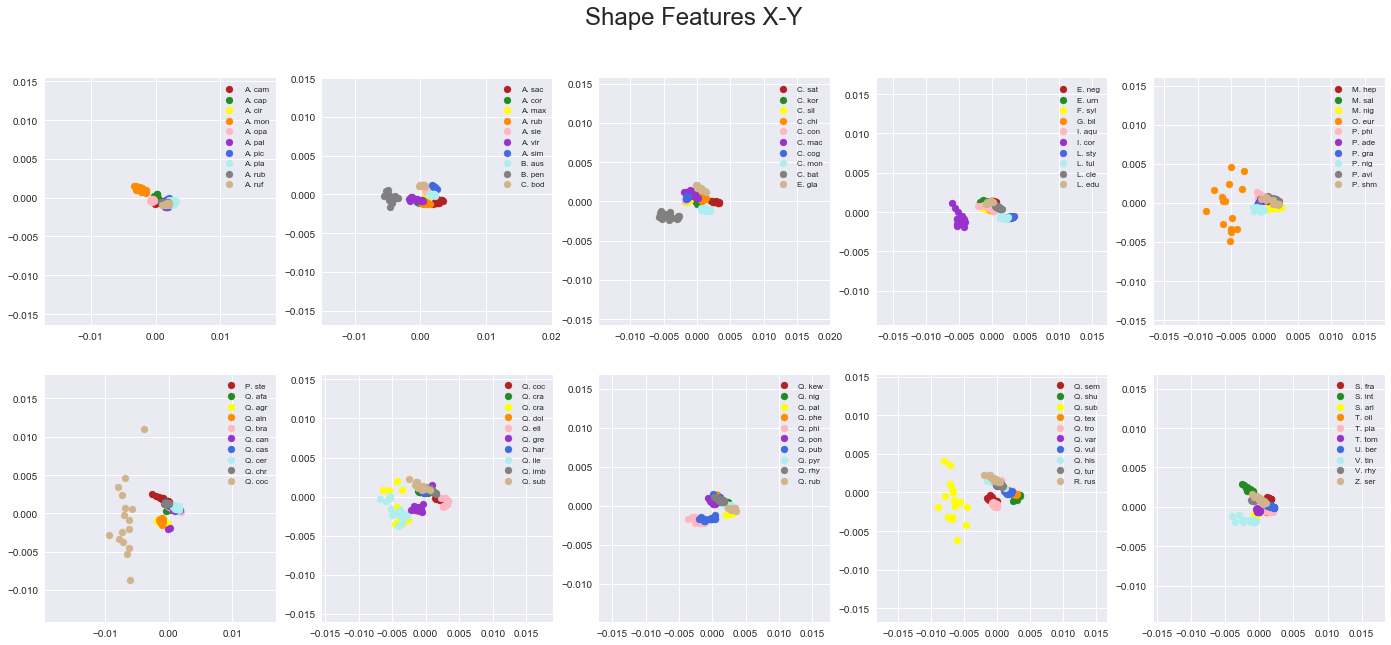

In [398]:
#Plot shape features for 10 species in each panel.
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(24,10))
#Call the plotting function.
plant_feature_plot(axes, shape, 'Shape Features X-Y', ' ')

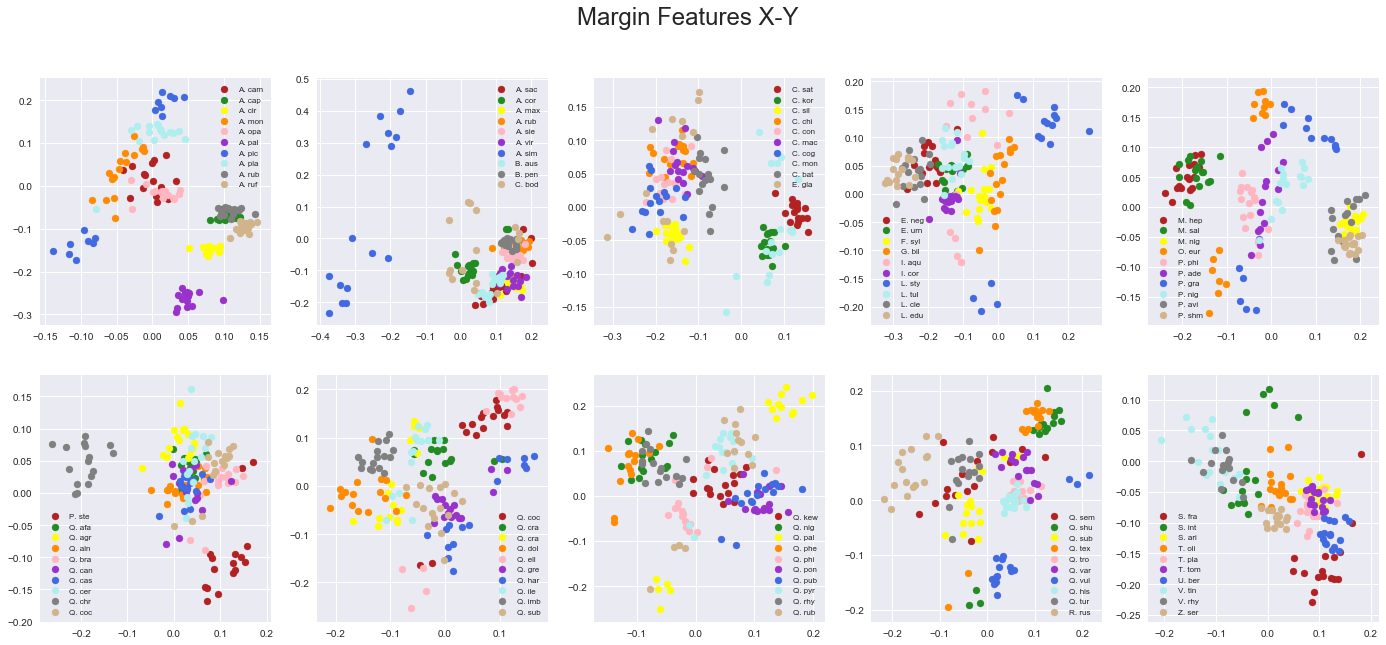

In [399]:
#Plot margin features for 10 species in each panel.
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(24,10))
plant_feature_plot(axes, margin, 'Margin Features X-Y', ' ')

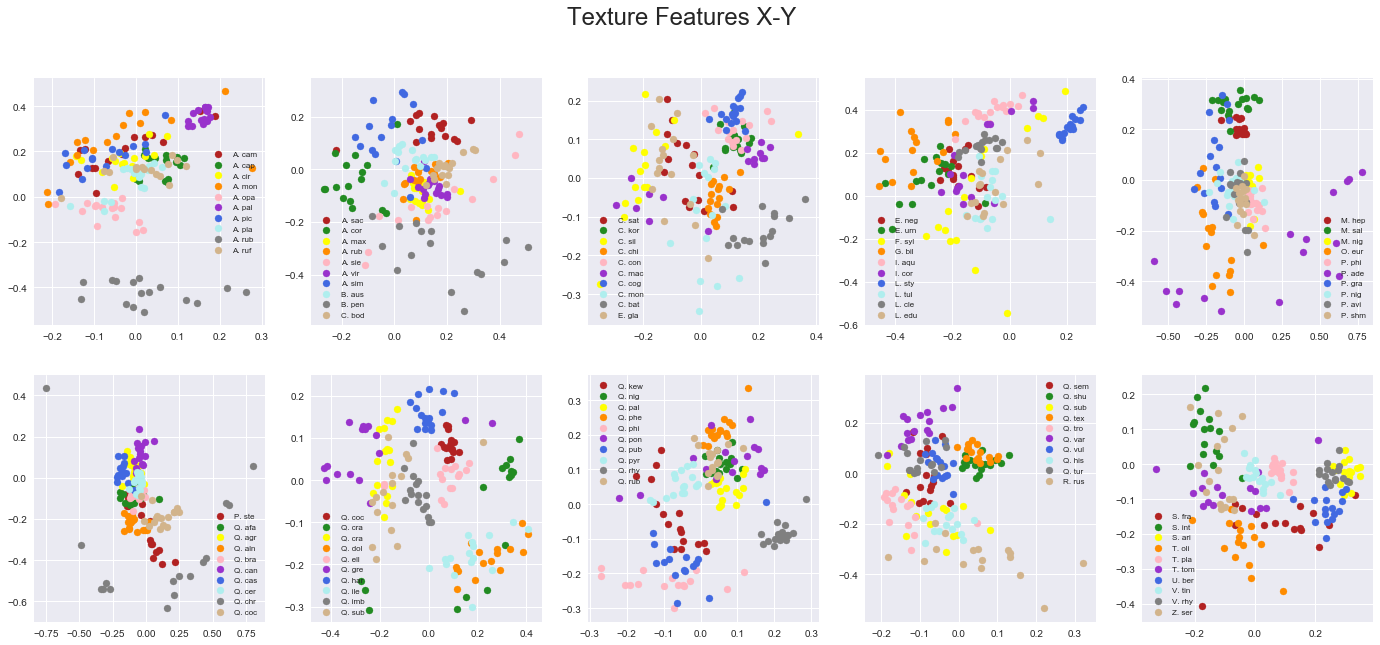

In [405]:
#Plot texture features for 10 species in each panel. Use the df_tex_fill dataset.
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(24,10))
plant_feature_plot(axes, texture_fill, 'Texture Features X-Y', ' ')

### Most species seem to cluster well by the shape features. However, shape does seem to efficiently seperate the species. In contrast, most Species seem to be well separated by the texture and margin features, although they are more spread out. 

### Chart view of the original 64 texture features for the first 10 species

In [524]:
from pandas_highcharts.display import display_charts
display_charts(df_tex_fill.ix[0:159,:].groupby(['tex0']).mean(), 
               title="Mean values of 64 texture feature vectors of the First 10 Species", kind='bar')

### Some species have signature texture vectors. For example, Acer Rubrum has higher values in tex26, tex33 and tex37. It should be easily seperated form the others. Indeed, it is well seperated in the 2-D presentation (first panel, grey scatters).

________

## Part II
### Meanwhile, I planned to extract my own leaf features from the leaf images (1600 images in total, 16 images/plant). The images were processed, identical in size, black and white in color.

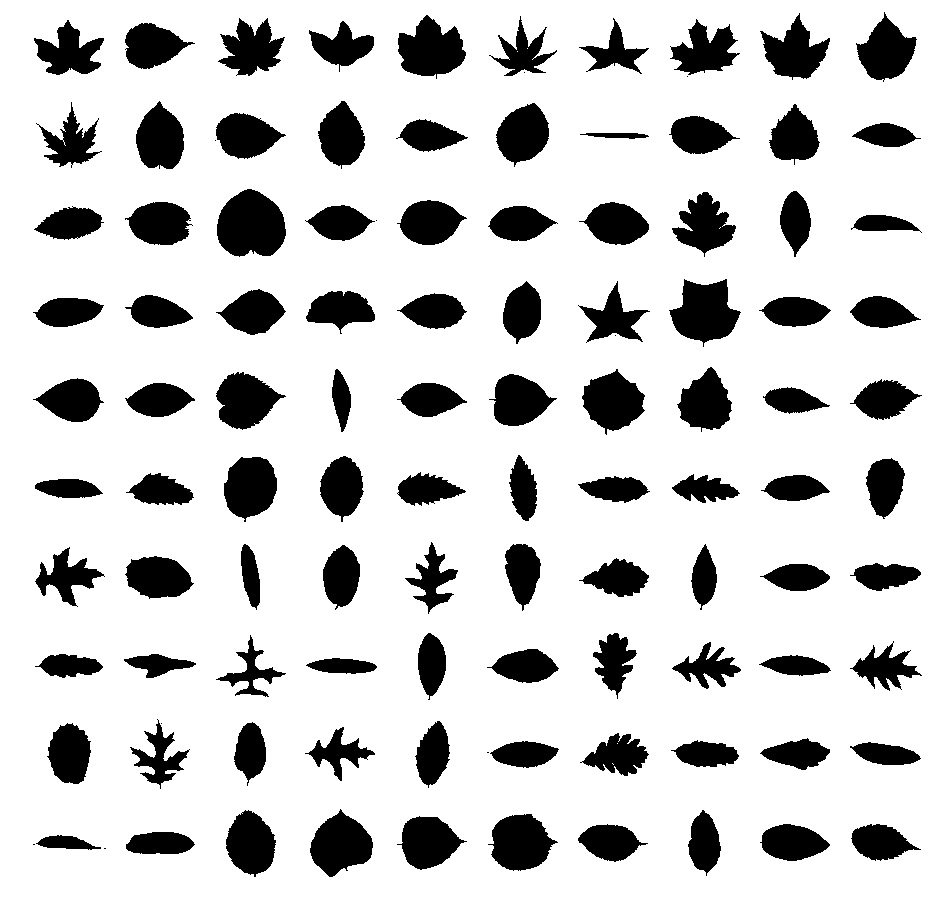

In [391]:
#Display one image for each plant species.
#Define the figure format.
fig, axes = plt.subplots(nrows=10, ncols=10, sharex=False, sharey=False, figsize=(16,16))

#Define the directory where the images are stored.
work_dir = 'data/100 leaves plant species/data/'

#Collect the locations of the images.
all_item = os.listdir(work_dir)
loca = []
for item in all_item:
    if os.path.isdir(work_dir+item):
        loca.append(item)

#Plot the first image for each species.
for d, ax in zip(loca, axes.flat):
    f = work_dir+d+'/'+d+'_01.ab.jpg'
    im = io.imread(f)
    ax.imshow(im)
    ax.set_xlim(0,im.shape[1])
    ax.set_ylim(im.shape[0],0)
    ax.grid(False)
    ax.axis('off')
plt.show()
plt.close()

### Use one image to test several feature extraction options in scikit-image

(614, 753)


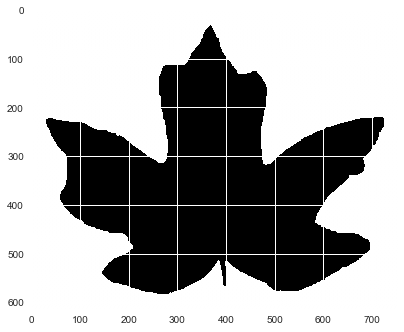

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]]


In [520]:
#Read the first image of the first species.
im = io.imread('data/100 leaves plant species/data/Acer_Campestre/Acer_Campestre_01.ab.jpg')
print(im.shape) #The size of the data/image
plt.imshow(im) #Visualize the image.
plt.show()
print(im) #The content of data/image.

(614, 753)


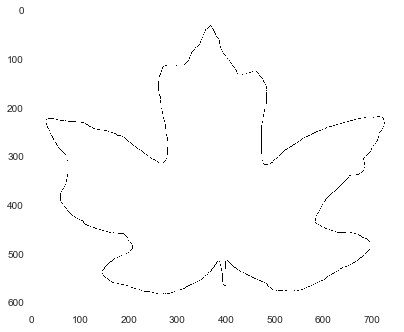

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [521]:
#Extract the edge features
#Filter an image using the Canny algorithm
edge = feature.canny(im, 
                      sigma=2, 
                      low_threshold=None, 
                      high_threshold=None, 
                      mask=None, 
                      use_quantiles=False)
print(edge.shape)
plt.imshow(edge)
plt.show()
print(edge)

(614, 753)


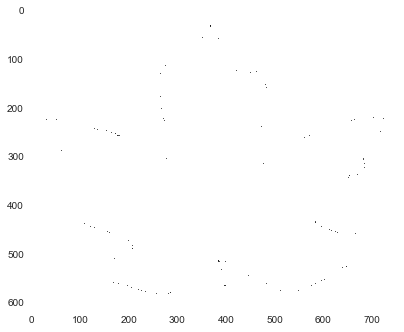

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [522]:
#Extract the corner features.
fcor = feature.corner_fast(im, n=9, threshold=0.5)
print(fcor.shape)
plt.imshow(fcor)
plt.show()
print(fcor)

In [59]:
#Extract daisy(this can be very slow).
#DAISY is a feature descriptor similar to SIFT formulated in a way that allows for fast dense extraction. 
#Typically, this is practical for bag-of-features image representations.
descs,descs_img = feature.daisy(im, step=16, radius=15, rings=3, histograms=8, 
                      orientations=8, normalization='l1', sigmas=None, 
                      ring_radii=None, visualize=True)

print(descs.shape)

(37, 46, 200)


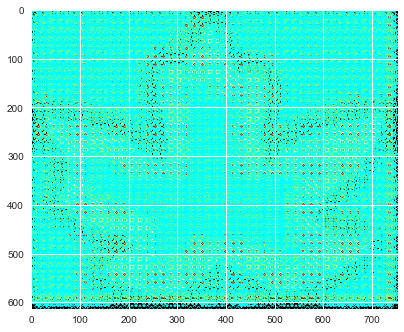

In [60]:
#When visualize is set True for daisy, the result can be plotted
plt.imshow(descs_img)
plt.show()

In [63]:
#Extract Histogram of Oriented Gradients (HOG).
#This can be considered as a more advanced form of shape/edge extraction.
hog,hog_img = feature.hog(im, orientations=9, pixels_per_cell=(50, 50), 
                          cells_per_block=(3, 3), visualise=True, 
                          transform_sqrt=False, feature_vector=True, normalise=None)
print(hog.shape)

(551448,)


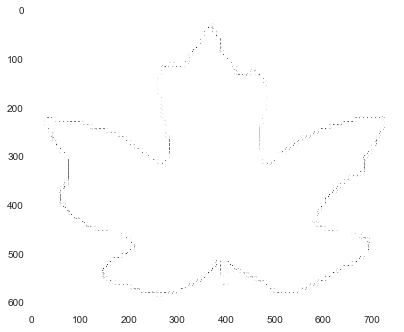

[ 0.05335147  0.          0.00503002  0.          0.03556765  0.          0.
  0.          0.          0.05690823  0.          0.01509007  0.
  0.03201088  0.          0.01006005  0.          0.          0.060465    0.
  0.01509007  0.          0.03201088  0.          0.01006005  0.          0.
  0.0497947   0.          0.00503002  0.          0.03556765  0.
  0.00503002  0.          0.          0.05335147  0.          0.01509007
  0.          0.03556765  0.          0.01509007  0.          0.
  0.05690823  0.          0.01509007  0.          0.03556765]


In [64]:
plt.imshow(hog_img)
plt.show()
print(hog[:50])

(614, 753)


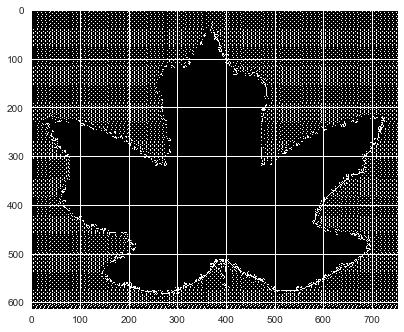

In [400]:
#Extract local binary pattern.
#LBP is an invariant descriptor that can be used for texture classification.
lbp = feature.local_binary_pattern(im, P=20, R=1.0, method='default')
print(lbp.shape)
plt.imshow(lbp)
plt.show()

In [25]:
#Extract ORB (Oriented FAST and rotated BRIEF) descriptors.
#ORB: An efficient alternative to SIFT and SURF, scale and orientation invariant!!
orb = feature.ORB(downscale=1.2, n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.15, harris_k=0.04)
orb.detect_and_extract(im)
print(orb.scales[:5]) #Corresponding scales.
print(orb.orientations[:5]) #Corresponding orientations in radians.
print(orb.responses[:5]) #Harris corner responses
print(orb.descriptors) #array of binary descriptors 
print(orb.keypoints[:5]) #keypoint coordinates (row, col) or (y, x).

[ 1.  1.  1.  1.  1.]
[ 1.78133618 -1.48855894 -0.63827369 -0.63561518  2.1965184 ]
[ 20.27778881  17.78524452  14.97261709  14.93101623  13.91989336]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False  True ..., False False  True]
 ..., 
 [ True  True False ..., False  True  True]
 [False False False ...,  True False False]
 [ True  True False ..., False  True  True]]
[[  31.  369.]
 [ 514.  384.]
 [ 469.  199.]
 [ 472.  199.]
 [ 316.  477.]]


In [26]:
#Check the shapes/sizes of the output data.
print(orb.scales.shape)
print(orb.orientations.shape)
print(orb.responses.shape)
print(orb.descriptors.shape)
print(orb.keypoints.shape)

(200,)
(200,)
(200,)
(200, 256)
(200, 2)


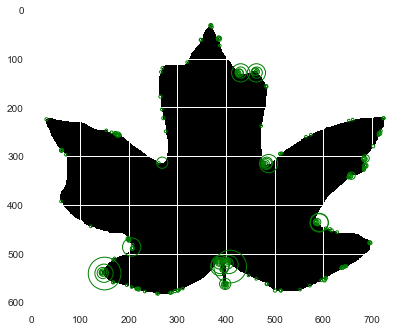

In [27]:
#Show the extracted keypoints on the image.
plt.imshow(im)
plt.scatter(orb.keypoints[:,1],orb.keypoints[:,0], 
            facecolors='none',edgecolor='green', 
            linewidth=1, s=7**orb.scales)
# plt.xlim(350,600)
# plt.ylim(350,100)
plt.show()

--------

### I decided to first extract ORB keypoints and descriptors.

In [383]:
#Exract features for all plant images and store them as list of arrays.
#Define empty lists.
des = []
res = []
ori = []
sca = []
#Define ORB.
#fast_n is set to 8 so that ~200 keypoints will be selected for all images.
#higher fast_n value makes it difficult to select 200 keypoints for some types of leaves.
orb = feature.ORB(downscale=1.2, n_scales=8, n_keypoints=200, fast_n=8, fast_threshold=0.15, harris_k=0.04)
for d in loca:
    f_list = os.listdir(work_dir+d)
    jpg_list = []
    for f in f_list:
        if '.jpg' in f: jpg_list.append(f)
    for i in jpg_list:
        #read an image
        im_orb = io.imread(work_dir+d+'/'+i)
        #extract ORB features.
        orb.detect_and_extract(im_orb)
        #put the plant name as the first item of the arrays.
        r1 = np.concatenate(([d],orb.descriptors.astype(int).flat))
        r2 = np.concatenate(([d],orb.scales))
        r3 = np.concatenate(([d],orb.responses))
        r4 = np.concatenate(([d],orb.orientations))
        #add the plant name associated features into the feature lists (list of arrays)
        des.append(r1)
        sca.append(r2)
        res.append(r3)
        ori.append(r4)
print('Done!')

Done!


In [384]:
#save the lists of the extracted features
pd.DataFrame(des).to_csv('./data/100 leaves plant species/orb_des.csv') #This file is very big!!
pd.DataFrame(sca).to_csv('./data/100 leaves plant species/orb_sca.csv')
pd.DataFrame(res).to_csv('./data/100 leaves plant species/orb_res.csv')
pd.DataFrame(ori).to_csv('./data/100 leaves plant species/orb_ori.csv')
print('Done!')

Done!


### Check the descritptor file, which may be useful for classification.

In [224]:
orb_des = pd.read_csv('./data/100 leaves plant species/orb_des.csv')
orb_des.head(2)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,51191,51192,51193,51194,51195,51196,51197,51198,51199,51200
0,0,Acer_Campestre,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,1,0,1
1,1,Acer_Campestre,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [261]:
#Check the amount of null values in the files.
print(orb_des.isnull().sum().sum())

0


In [226]:
#Dimension reduction for the dataset of orb descriptors
orb_des_2d = mds.fit_transform(orb_des.ix[:,2:])
print('Done!')

Done!


In [227]:
orb_des_2d

array([[-105.33638369,   10.9177127 ],
       [ -16.9698046 ,  112.17970262],
       [-110.0919069 ,   16.30239439],
       ..., 
       [  38.3525001 , -111.76055424],
       [  53.70669839, -113.88845955],
       [  44.15497929, -117.33548478]])

In [258]:
#Create a dataframe for plotting
orb_descriptor = pd.DataFrame()
orb_descriptor['desc'] = pd.DataFrame(orb_des.ix[:,1])
orb_descriptor=orb_descriptor.join(pd.DataFrame(orb_des_2d, columns=['ORB_Desc X','ORB_Desc Y']))
orb_descriptor.head(2)

,desc,ORB_Desc X,ORB_Desc Y
0,Acer_Campestre,-105.336384,10.917713
1,Acer_Campestre,-16.969805,112.179703


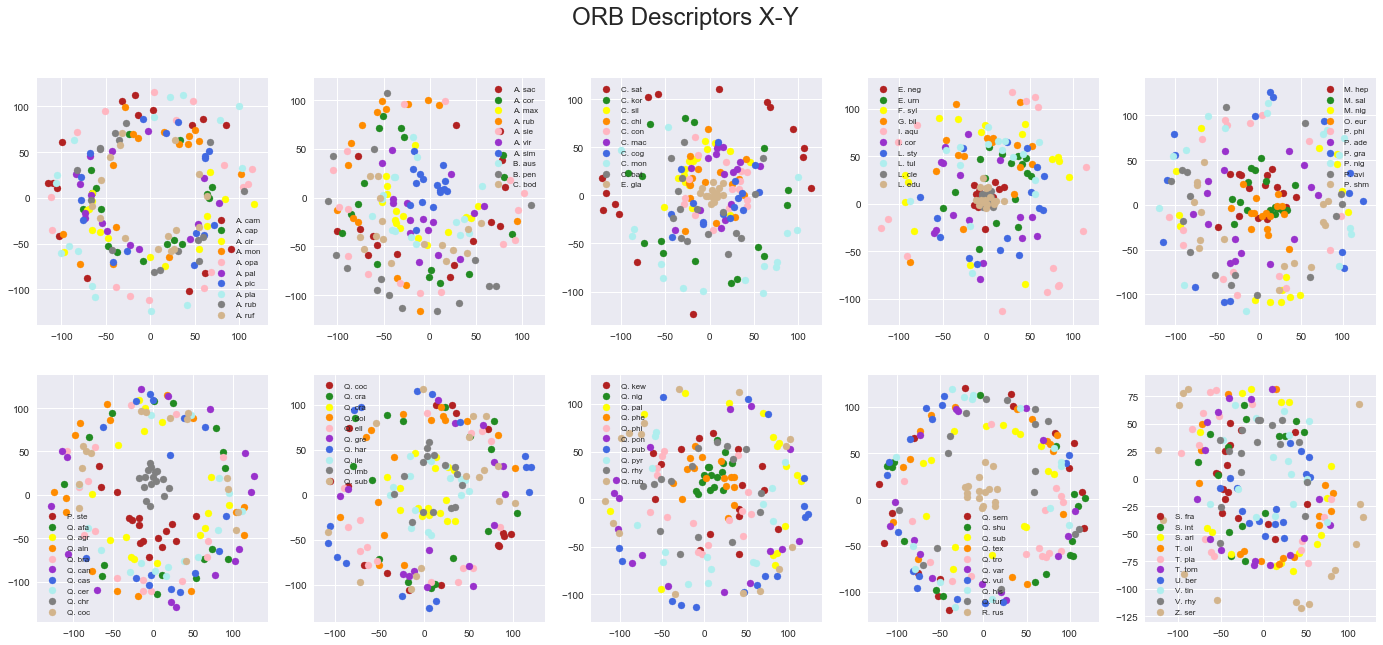

In [406]:
#Plot ORB descriptor features for 10 species in each panel.
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(24,10))
plant_feature_plot(axes, orb_descriptor, 'ORB Descriptors X-Y', '_')

### The descriptors reduced to 2 d show ring like distribution. Some species seem to be well separated.

------

### Second, extract canny edges

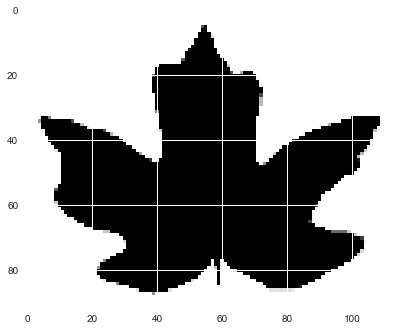

In [392]:
#Re-scale an image. Otherwise, the size of extracted features would be too large for my laptop.
from skimage.transform import rescale
image1 = io.imread('data/100 leaves plant species/data/Acer_Campestre/Acer_Campestre_01.ab.jpg')
image1_rescaled = rescale(image1, 0.15)
plt.imshow(image1_rescaled)
plt.show()

In [ ]:
#Re-scale all images.
#Define location for storage of re-scaled images.
small_dir = 'data/100 leaves plant species/small_data/'
#Read original files, re-scale, and save the new images in a new directory with the same names.
for d in loca:
    f_list = os.listdir(work_dir+d)
    jpg_list = []
    for f in f_list:
        if '.jpg' in f: jpg_list.append(f)
    if d not in os.listdir(small_dir):
        os.makedirs(small_dir+d)
    for i in jpg_list:
        image = io.imread(work_dir+d+'/'+i)
        im_rescaled = rescale(image, 0.15)
        io.imsave(small_dir+d+'/'+i, im_rescaled)

In [375]:
#Exract canny edges for all plant small images and store them as list of arrays.
#Define empty lists.
cann = []
#Read re-scaled small image, and extract edge features
for d in loca:
    f_list = os.listdir(small_dir+d)
    jpg_list = []
    for f in f_list:
        if '.jpg' in f: jpg_list.append(f)
    for i in jpg_list:
        #read a re-scaled small image
        im_cann = io.imread(small_dir+d+'/'+i)
        #extract canny edges.
        edge = feature.canny(im_cann,sigma=2,low_threshold=None,high_threshold=None,mask=None,use_quantiles=False)        
        #put the plant name as the first item of the arrays.
        r = np.concatenate(([d], edge.astype(int).flat), axis=0)
        #add the plant name associated features into the feature lists (list of arrays)
        cann.append(r)
print('Done!')

Done!


In [376]:
#save the list of the extracted edge features
pd.DataFrame(cann).to_csv('./data/100 leaves plant species/cann.csv') #This file is very big!!
print('Done!')

Done!


In [377]:
pd.DataFrame(cann).shape

(1600, 31258)

In [379]:
cedge = pd.read_csv('./data/100 leaves plant species/cann.csv',header=0,
                    names=['cedge'+str(i) for i in range(31258)])

In [380]:
cedge.shape

(1600, 31258)

In [382]:
cedge.head(2)

,cedge0,cedge1,cedge2,cedge3,cedge4,cedge5,cedge6,cedge7,cedge8,cedge9,...,cedge31248,cedge31249,cedge31250,cedge31251,cedge31252,cedge31253,cedge31254,cedge31255,cedge31256,cedge31257
0,Acer_Campestre,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer_Campestre,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
#There are a lot of NaN values becuase the sizes of the images are different.
#Fill in 0 for the NaN values.
cedge.fillna(0, inplace=True)

In [384]:
#Check null.
cedge.isnull().sum().sum()

0

In [385]:
#Dimension reduction
cedge_2d = mds.fit_transform(cedge.ix[:,'cedge1':])
print('Done!')

Done!


In [386]:
canny_edge=cedge[['cedge0']].join(pd.DataFrame(cedge_2d, columns=['Canny Edge X','Canny Edge Y']))
canny_edge.head(2)

,cedge0,Canny Edge X,Canny Edge Y
0,Acer_Campestre,14.925948,16.236178
1,Acer_Campestre,13.257176,10.912789


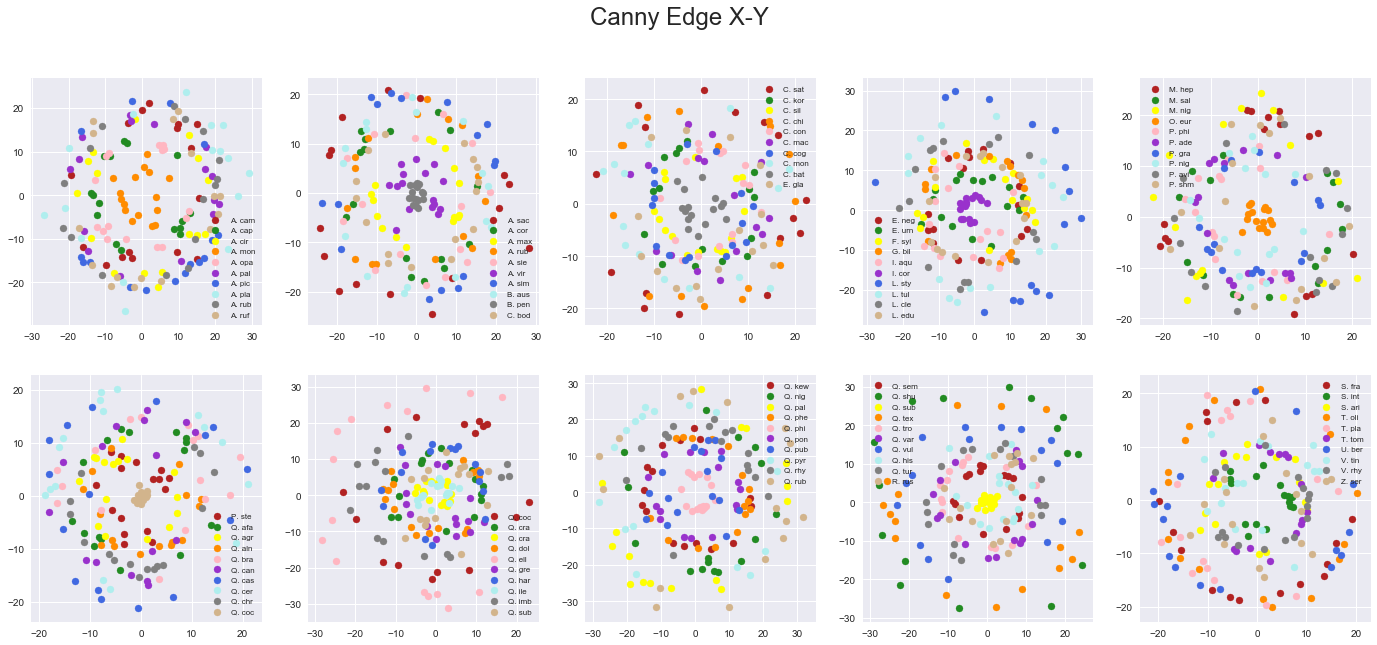

In [407]:
#Plot canny edge features for 10 species in each panel.
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(24,10))
plant_feature_plot(axes, canny_edge, 'Canny Edge X-Y', '_')

### The edge features reduced to 2 d show ring like distribution. Some species seem to be well separated.